# Cellula Task 2 

### Import libraries

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import optuna
from sklearn.feature_selection import RFE, SelectKBest, chi2,f_classif

In [3]:
df = pd.read_csv("C:/Users/Ahmed/Downloads/first inten project.csv")

In [5]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [7]:
print(df.shape)
df.tail()

(36285, 17)


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


The dataset contains 36285 objects (rows), for each of which  features 17 are set (columns)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'Booking_ID':
['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']


Unique values in 'number of adults':
[1 2 3 0 4]


Unique values in 'number of children':
[ 1  0  2  3 10  9]


Unique values in 'number of weekend nights':
[2 1 0 4 3 6 5 7]


Unique values in 'number of week nights':
[ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]


Unique values in 'type of meal':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


Unique values in 'car parking space':
[0 1]


Unique values in 'room type':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


Unique values in 'lead time':
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   

In [11]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

#### Dataset Overview

This dataset contains information related to bookings and reservations. Below is a detailed description of each column and its unique values.

##### Columns

1. **`Booking_ID`**: 
   - Unique Identifier for each booking.
   - Example Values: `INN00001`, `INN00002`, `INN36286`

2. **`number of adults`**: 
   - Number of adults included in the booking.
   

3. **`number of children`**: 
   - Number of children included in the booking.
   

4. **`number of weekend nights`**: 
   - Number of nights during the weekend included in the booking (Saturday or Sunday).
   

5. **`number of week nights`**: 
   - Number of nights during the week included in the booking (Monday to Friday).
   

6. **`type of meal`**: 
   - Meal plan associated with the booking.
   - Unique Values: `Meal Plan 1`, `Meal Plan 2`, `Meal Plan 3`, `Not Selected`

7. **`car parking space`**: 
   - Indicates if a car parking space is included in the booking.
   - Unique Values: `0`, `1`

8. **`room type`**: 
   - Type of room reserved.
   - Unique Values: `Room_Type 1`, `Room_Type 2`, `Room_Type 3`, `Room_Type 4`, `Room_Type 5`, `Room_Type 6`, `Room_Type 7`

9. **`lead time`**: 
   - Number of days between the booking date and the arrival date.
   

10. **`market segment type`**: 
    - Market segment from which the booking was made.
    - Unique Values: `Offline`, `Online`, `Corporate`, `Aviation`, `Complementary`

11. **`repeated`**: 
    - Indicates if the booking is a repeat booking.
    - Unique Values: `0`, `1`

12. **`P-C`**: 
    - Number of previous cancellations.
    

13. **`P-not-C`**: 
    - Number of previous non-cancellations.
    

14. **`average price`**: 
    - Average price of the booking.
    

15. **`special requests`**: 
    - Number of special requests made with the booking.
    

16. **`date of reservation`**: 
    - Date when the reservation was made.
    - Example Dates: `10/2/2015`, `11/6/2018`, `2/28/2018`, `5/20/2017`

17. **`booking status`**: 
    - Status of the booking (e.g., confirmed, canceled, checked-in).
    - Example Values: `Not_Cancelled`, `Cancelled`, 



In [14]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [15]:
df.describe(include=['object'])

,Booking_ID,type of meal,room type,market segment type,date of reservation,booking status
count,36285,36285,36285,36285,36285,36285
unique,36285,4,7,5,553,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,10/13/2018,Not_Canceled
freq,1,27842,28138,23221,254,24396


### Data Preprocessing

#### Check for Null values

In [19]:
# Checking for null values
print(df.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


#### Remove/Correct Whitespaces

In [21]:
# Removing whitespaces from categorical columns
df.columns = df.columns.str.strip() 


#### Data Types

In [23]:
df.dtypes

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [24]:
def to_date(date):
    try:
        # Convert the cleaned date to datetime with the correct format
        return pd.to_datetime(date, format='%m/%d/%Y')
    except ValueError as e:
        # Handle date conversion error
        print(f"Error: {e}")
        return None  # Return None for invalid dates

In [26]:
df['Booking_ID'] = df['Booking_ID'].fillna('').astype(str)
df['type of meal'] = df['type of meal'].astype('category')
df['car parking space'] = df['car parking space'].astype(bool)
df['room type'] = df['room type'].astype('category')
df['market segment type'] = df['market segment type'].astype('category')
df['repeated'] = df['repeated'].astype(bool)
df['booking status'] = df['booking status'].astype('category')



# Correct invalid dates in the 'date of reservation' column
df.loc[df['date of reservation'] == '2018-2-29', 'date of reservation'] = '2/28/2018'


# Convert the cleaned date to datetime
df['date of reservation'] = df['date of reservation'].apply(to_date)


In [28]:
df.dtypes

Booking_ID                          object
number of adults                     int64
number of children                   int64
number of weekend nights             int64
number of week nights                int64
type of meal                      category
car parking space                     bool
room type                         category
lead time                            int64
market segment type               category
repeated                              bool
P-C                                  int64
P-not-C                              int64
average price                      float64
special requests                     int64
date of reservation         datetime64[ns]
booking status                    category
dtype: object

### Check and Handle Outliers 

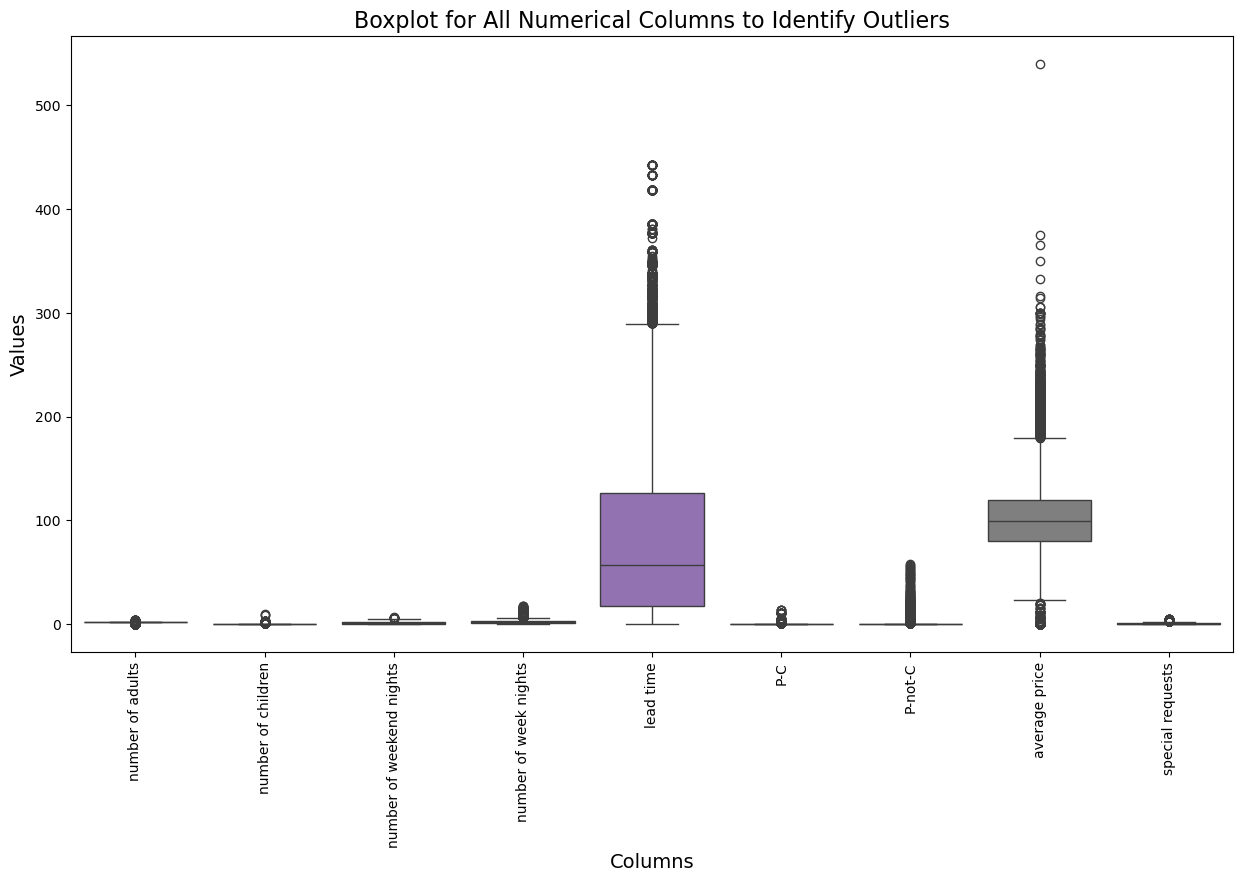

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numerical columns only
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 8))

# Create the boxplot for all numerical columns
sns.boxplot(data=df[numerical_cols])

# Add title and labels
plt.title('Boxplot for All Numerical Columns to Identify Outliers', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [32]:
from scipy import stats

# Z-Score method
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]


In [33]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,False,Room_Type 1,224,Offline,False,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,False,Room_Type 1,5,Online,False,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,False,Room_Type 1,1,Online,False,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,False,Room_Type 1,211,Online,False,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,False,Room_Type 1,48,Online,False,0,0,77.00,0,2018-04-11,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36278,INN36279,2,0,0,2,Meal Plan 1,False,Room_Type 1,211,Online,False,0,0,100.00,0,2018-05-20,Canceled
36279,INN36281,2,0,1,1,Not Selected,False,Room_Type 1,48,Online,False,0,0,94.50,0,2018-04-11,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,False,Room_Type 1,34,Online,False,0,0,107.55,1,2017-10-15,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,False,Room_Type 4,83,Online,False,0,0,105.61,1,2018-12-26,Not_Canceled


### Feature Engineer

In [35]:
df_encoding = df.copy()


#### Drop Unnessary Features

In [38]:
df_encoding.drop(columns=['Booking_ID'], axis=1, inplace=True)

#### Feature Selection

In [44]:
# Total nights (weekend + weekdays)
df_encoding['total_nights'] = df_encoding['number of weekend nights'] + df_encoding['number of week nights']

# Group size (total number of people)
df_encoding['total_people'] = df_encoding['number of adults'] + df_encoding['number of children']

#### Transformation For The Categorical Data

In [46]:
# Perform One-Hot Encoding on categorical features
df_encoding = pd.get_dummies(df_encoding, columns=['type of meal', 'room type', 'market segment type'], drop_first=True)

In [47]:
# Check for categorical columns
categorical_columns = df_encoding.select_dtypes(exclude=['int64' , 'float']).columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['car parking space', 'repeated', 'date of reservation',
       'booking status', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')


#### features Encoding

In [49]:
# Extracting date-related features
df_encoding['reservation_year'] = df_encoding['date of reservation'].dt.year
df_encoding['reservation_month'] = df_encoding['date of reservation'].dt.month
df_encoding['reservation_day'] = df_encoding['date of reservation'].dt.day
df_encoding['reservation_weekday'] = df_encoding['date of reservation'].dt.weekday  # 0=Monday, 6=Sunday
df_encoding.drop(columns=['date of reservation'], inplace=True)

In [50]:
# Check if there are any remaining non-numeric columns
non_numeric_columns = df_encoding.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns remaining:\n", non_numeric_columns)


Non-numeric columns remaining:
 Index(['car parking space', 'repeated', 'booking status',
       'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3',
       'type of meal_Not Selected', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online', 'reservation_year', 'reservation_month',
       'reservation_day', 'reservation_weekday'],
      dtype='object')


In [51]:
# Check for missing values
missing_values = df_encoding.isnull().sum()
print("Missing Values:\n", missing_values)

# If you find missing values, you can decide to:
# a) Drop rows with missing values
df_encoding.dropna(inplace=True)



Missing Values:
 number of adults                     0
number of children                   0
number of weekend nights             0
number of week nights                0
car parking space                    0
lead time                            0
repeated                             0
P-C                                  0
P-not-C                              0
average price                        0
special requests                     0
booking status                       0
total_nights                         0
total_people                         0
type of meal_Meal Plan 2             0
type of meal_Meal Plan 3             0
type of meal_Not Selected            0
room type_Room_Type 2                0
room type_Room_Type 3                0
room type_Room_Type 4                0
room type_Room_Type 5                0
room type_Room_Type 6                0
room type_Room_Type 7                0
market segment type_Complementary    0
market segment type_Corporate        0
market s

### Logistic Regression

#### Train Test Split


In [54]:
# Separate features (X) and target (y) 
X = df_encoding.drop(columns=['booking status'])
y = df_encoding['booking status']


In [55]:
from sklearn.model_selection import train_test_split

# Split the data (e.g., 80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (28349, 30), Test set: (5003, 30)


In [88]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Note: This is a binary classification problem where the target is the 'booking status'.
# Target classes:
# - 0: 'Not_Canceled'
# - 1: 'Canceled'

# Step 1: Scale the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Step 5: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 6: Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8053
Confusion Matrix:
[[1259  831]
 [ 468 4113]]
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.73      0.60      0.66      2090
Not_Canceled       0.83      0.90      0.86      4581

    accuracy                           0.81      6671
   macro avg       0.78      0.75      0.76      6671
weighted avg       0.80      0.81      0.80      6671



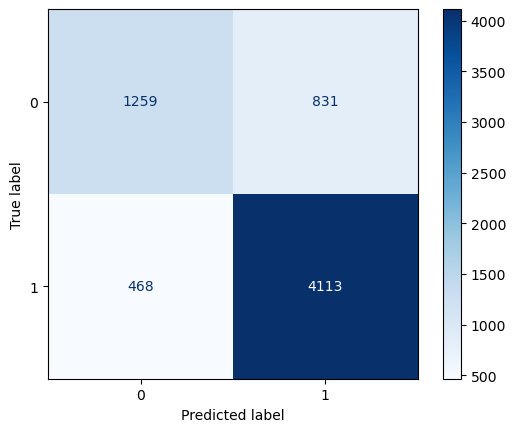

In [90]:
# Assuming y_true is the true labels and y_pred is the model predictions
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()


#### Do a Grid search for hyper parameter Tuning

In [105]:
# Step 3: Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    C = trial.suggest_loguniform('C', 0.01, 100)  # Regularization strength
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 300)  # Maximum number of iterations

    # Initialize the Logistic Regression model with the suggested hyperparameters
    model = LogisticRegression(C=C, solver=solver, max_iter=max_iter)

    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Return the accuracy
    return accuracy_score(y_test, y_pred)

In [107]:
# Step 4: Create a study and optimize
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=50)  # Number of trials

# Step 5: Print the best parameters and the corresponding score
print(f"Best Parameters: {study.best_params}")
print(f"Best Test Accuracy: {study.best_value:.4f}")

# Step 6: Train the model with the best parameters
best_params = study.best_params
best_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'])
best_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Step 8: Evaluate the performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy with Best Parameters: {accuracy_best:.4f}")

# Step 9: Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

# Step 10: Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best))


[I 2024-09-29 22:26:15,875] A new study created in memory with name: no-name-0cce7fd2-27a5-47cb-a3c0-c172d7892560
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_6512\208322798.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 100)  # Regularization strength
C:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-09-29 22:26:17,825] Trial 0 finished with value: 0.805126667666017 and parameters: {'C': 50.184082648520466, 'solver': 'saga', 'max_iter': 204}. Best is trial 0 with value: 0.805126667666017.
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_6512\208322798.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6

Best Parameters: {'C': 0.0102452510247859, 'solver': 'liblinear', 'max_iter': 293}
Best Test Accuracy: 0.8066
Test Accuracy with Best Parameters: 0.8066
Confusion Matrix:
[[1258  832]
 [ 458 4123]]
Classification Report:
              precision    recall  f1-score   support

    Canceled       0.73      0.60      0.66      2090
Not_Canceled       0.83      0.90      0.86      4581

    accuracy                           0.81      6671
   macro avg       0.78      0.75      0.76      6671
weighted avg       0.80      0.81      0.80      6671



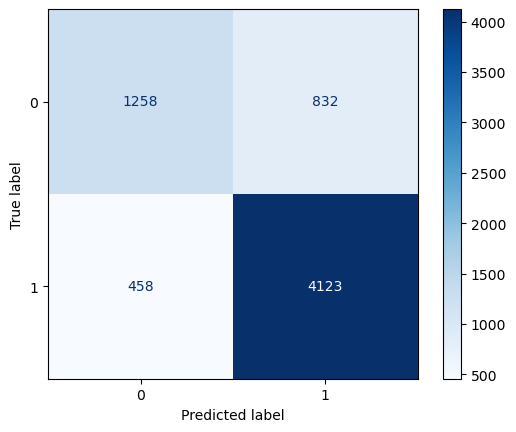

In [111]:
# Assuming y_true is the true labels and y_pred is the model predictions
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Selected Features from RFE: Index(['car parking space', 'lead time', 'repeated', 'P-C', 'average price',
       'special requests', 'market segment type_Complementary',
       'market segment type_Offline', 'market segment type_Online',
       'reservation_year'],
      dtype='object')
Selected Features from SelectKBest: Index(['number of adults', 'lead time', 'repeated', 'average price',
       'special requests', 'total_nights', 'total_people',
       'market segment type_Corporate', 'market segment type_Online',
       'reservation_year'],
      dtype='object')
Accuracy after RFE: 0.8090

Classification Report (RFE):
              precision    recall  f1-score   support

    Canceled       0.74      0.61      0.67      2090
Not_Canceled       0.83      0.90      0.87      4581

    accuracy                           0.81      6671
   macro avg       0.79      0.75      0.77      6671
weighted avg       0.80      0.81      0.80      6671



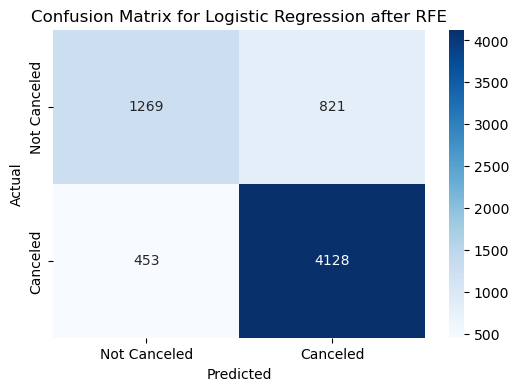

Accuracy after SelectKBest: 0.8060

Classification Report (SelectKBest):
              precision    recall  f1-score   support

    Canceled       0.73      0.60      0.66      2090
Not_Canceled       0.83      0.90      0.86      4581

    accuracy                           0.81      6671
   macro avg       0.78      0.75      0.76      6671
weighted avg       0.80      0.81      0.80      6671



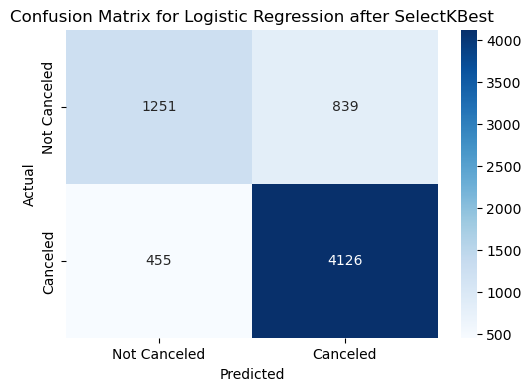

In [125]:
# ------------------- Feature Selection using RFE -------------------
# Step 3: RFE for feature selection
logreg = LogisticRegression(max_iter=1000)  # Logistic Regression for RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_scaled, y_train)

# Step 4: Get the selected features using original column names
selected_features_rfe = X.columns[rfe.support_]  # Get column names using boolean mask
print(f"Selected Features from RFE: {selected_features_rfe}")

# Transform the training and test data using only the selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# ------------------- Feature Selection using SelectKBest -------------------
# Step 5: SelectKBest for feature selection
select_k_best = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features based on ANOVA F-value
select_k_best.fit(X_train_scaled, y_train)

# Step 6: Get the selected features from SelectKBest
selected_features_kbest = X.columns[select_k_best.get_support()]  # Get selected feature names
print(f"Selected Features from SelectKBest: {selected_features_kbest}")

# Transform the training and test data using only the selected features
X_train_kbest = select_k_best.transform(X_train_scaled)
X_test_kbest = select_k_best.transform(X_test_scaled)

# ------------------- Train and Evaluate Logistic Regression Model -------------------
# Step 7: Train the model using RFE-selected features
model_rfe = LogisticRegression(max_iter=1000)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

# Step 8: Evaluate the model using RFE-selected features
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe:.4f}")
print("\nClassification Report (RFE):")
print(classification_report(y_test, y_pred_rfe))

# Step 9: Display confusion matrix for RFE
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix for Logistic Regression after RFE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 10: Train the model using SelectKBest-selected features
model_kbest = LogisticRegression(max_iter=1000)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

# Step 11: Evaluate the model using SelectKBest-selected features
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
print(f"Accuracy after SelectKBest: {accuracy_kbest:.4f}")
print("\nClassification Report (SelectKBest):")
print(classification_report(y_test, y_pred_kbest))

# Step 12: Display confusion matrix for SelectKBest
cm_kbest = confusion_matrix(y_test, y_pred_kbest)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_kbest, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix for Logistic Regression after SelectKBest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [127]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df_encoding is your pre-processed DataFrame with features and target
X = df_encoding.drop('booking status', axis=1)
y = df_encoding['booking status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Save the trained model to a file using Pickle
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Load the model back from the file
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Test Accuracy with Loaded Model: {accuracy_loaded:.4f}")


Test Accuracy with Loaded Model: 0.8053


In [131]:
df.dtypes

Booking_ID                          object
number of adults                     int64
number of children                   int64
number of weekend nights             int64
number of week nights                int64
type of meal                      category
car parking space                     bool
room type                         category
lead time                            int64
market segment type               category
repeated                              bool
P-C                                  int64
P-not-C                              int64
average price                      float64
special requests                     int64
date of reservation         datetime64[ns]
booking status                    category
dtype: object